In [1]:
import hiive.mdptoolbox 
import numpy as np 
import pandas as pd 

import gym
from gym import wrappers 

import hiive.mdptoolbox 
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import hiive.mdptoolbox.example
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display
# import mdptoolbox, mdptoolbox.example
from gym.envs.toy_text import frozen_lake
import random
from tqdm.notebook import tqdm
from utils import get_score, get_policy, result_plots, plot_lake, valueIteration, policyIteration, Q_learning, ql_plot_result
import seaborn as sns

%matplotlib inline

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/matplotlib/__init__.py:202: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/matplotlib/backend_bases.py:60: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(PILLOW_VERSION) >= "3.4":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site

In [2]:
seed = 123
np.random.seed(seed)
pd.options.mode.chained_assignment = None

## Frozen Lake 

_____OBSERVATION SPACE_____ 

Observation Space Discrete(16)
Sample observation 8

 _____ACTION SPACE_____ 

Action Space Shape 4


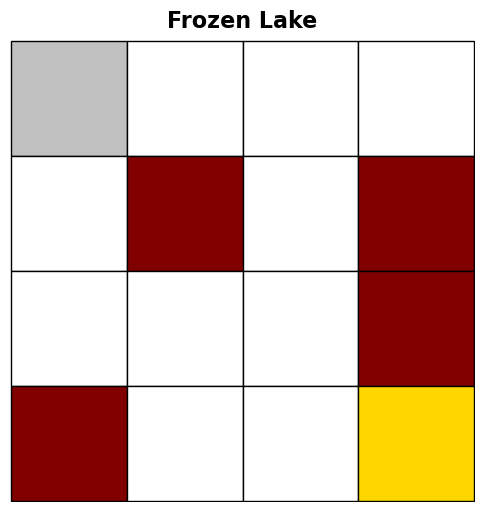

In [3]:
lake_env = gym.make('FrozenLake-v1').unwrapped

lake_env.max_episode_steps=250
plot_lake(lake_env)
# Create transition and reward matrices from OpenAI P matrix
rows = lake_env.nrow
cols = lake_env.ncol
T = np.zeros((4, rows*cols, rows*cols))
R = np.zeros((4, rows*cols, rows*cols))

old_state = np.inf

for square in lake_env.P:
    for action in lake_env.P[square]:
        for i in range(len(lake_env.P[square][action])):
            new_state = lake_env.P[square][action][i][1]
            if new_state == old_state:
                T[action][square][lake_env.P[square][action][i][1]] = T[action][square][old_state] + lake_env.P[square][action][i][0]
                R[action][square][lake_env.P[square][action][i][1]] = R[action][square][old_state] + lake_env.P[square][action][i][2]
            else:
                T[action][square][lake_env.P[square][action][i][1]] = lake_env.P[square][action][i][0]
                R[action][square][lake_env.P[square][action][i][1]] = lake_env.P[square][action][i][2]
            old_state = lake_env.P[square][action][i][1]
            

print("_____OBSERVATION SPACE_____ \n")
print("Observation Space", lake_env.observation_space)
print("Sample observation", lake_env.observation_space.sample())

#### Action Space #####
# 0: GO LEFT
# 1: GO DOWN
# 2: GO RIGHT
# 3: GO UP
#######################

print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", lake_env.action_space.n)

Value Iteration


In [4]:
gammas   = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
epsilons = [1e-2, 1e-4, 1e-6, 1e-10, 1e-12, 1e-14]
value_iter  = valueIteration(lake_env, rows, cols, T, R, gammas, epsilons, showResults=False)
target = ['gamma', 'epsilon', 'time', 'iterations', 'reward']
vi_df = value_iter[target]

Gamma,	Eps,	Time,	Iter,	Reward
________________________________________________________________________________
0.10,	1E-02,	0.00,	1,	0.333333
0.10,	1E-04,	0.00,	3,	0.345185
0.10,	1E-06,	0.00,	5,	0.345239
0.10,	1E-10,	0.00,	9,	0.345239
0.10,	1E-12,	0.00,	11,	0.345239
0.10,	1E-14,	0.00,	13,	0.345239
0.20,	1E-02,	0.00,	2,	0.355556
0.20,	1E-04,	0.00,	5,	0.358979
0.20,	1E-06,	0.00,	7,	0.358991
0.20,	1E-10,	0.00,	13,	0.358992
0.20,	1E-12,	0.00,	15,	0.358992
0.20,	1E-14,	0.00,	18,	0.358992
0.40,	1E-02,	0.00,	3,	0.389630
0.40,	1E-04,	0.00,	8,	0.394313
0.40,	1E-06,	0.00,	12,	0.394332
0.40,	1E-10,	0.00,	21,	0.394332
0.40,	1E-12,	0.00,	26,	0.394332
0.40,	1E-14,	0.00,	31,	0.394332
0.60,	1E-02,	0.00,	6,	0.445120
0.60,	1E-04,	0.00,	13,	0.447623
0.60,	1E-06,	0.00,	21,	0.447649
0.60,	1E-10,	0.00,	37,	0.447649
0.60,	1E-12,	0.00,	46,	0.447649
0.60,	1E-14,	0.00,	54,	0.447649
0.80,	1E-02,	0.00,	11,	0.540600
0.80,	1E-04,	0.00,	28,	0.544175
0.80,	1E-06,	0.00,	45,	0.544195
0.80,	1E-10,	0.01,	79,	0.544196
0.

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type

Best Result:
	Success = 79.50
	Gamma = 0.90
	Epsilon= 1E-02


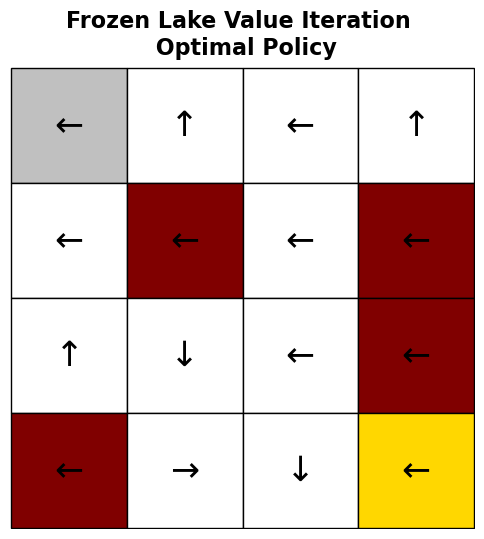

In [5]:

bestRun = value_iter['success_pct'].argmax()
best_policy = value_iter['policy'][bestRun]
best_policy = np.array(list(best_policy)[0])
best_policy = best_policy.reshape(rows, cols)

title='Frozen Lake Value Iteration \n Optimal Policy'
plot_lake(lake_env, best_policy, title)
print('Best Result:\n\tSuccess = %.2f\n\tGamma = %.2f\n\tEpsilon= %.E' % (value_iter['success_pct'].max(), 
                                                                          value_iter['gamma'][bestRun], 
                                                                          value_iter['epsilon'][bestRun]))

--------------------------------------------------
Avg_Steps 
 [17.976339610786457, 23.578791068356637, 24.369878374394375, 27.928397916886762, 29.15329557641702, 42.990114398179806]
--------------------------------------------------
Avg_Success 
 [26.73333333333333, 32.949999999999996, 37.96666666666667, 41.0, 45.43333333333334, 78.36666666666666]
--------------------------------------------------
Avg_time 
 [0.0004957914352416992, 0.0007402499516805013, 0.0011309385299682617, 0.0018808444341023762, 0.004114429155985515, 0.00816333293914795]
--------------------------------------------------
Avg_iter 
 [7.0, 10.0, 16.833333333333332, 29.5, 61.666666666666664, 127.66666666666667]


/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
 

<Figure size 1200x1200 with 0 Axes>

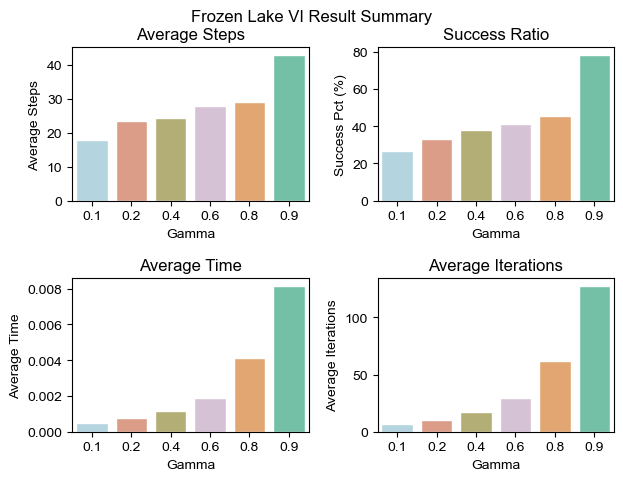

In [6]:
target_name = "Frozen Lake VI Result Summary"
model = 'VI'
result_plots(model, target_name, value_iter, gammas, policy_iter = None)


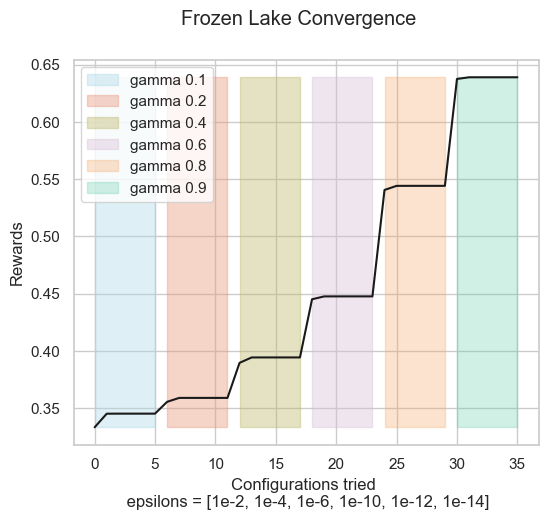

In [7]:
target = value_iter['reward']
custom_color = ['lightblue','darksalmon', 'darkkhaki', 'thistle', 'sandybrown', 'mediumaquamarine']

plt.figure(figsize=(6,5))
plt.plot(target, color = 'k')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.1),  alpha=0.4, color =custom_color[0], label = 'gamma 0.1')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.2),  alpha=0.4, color =custom_color[1], label = 'gamma 0.2')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.4),  alpha=0.4, color =custom_color[2], label = 'gamma 0.4')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.6),  alpha=0.4, color =custom_color[3], label = 'gamma 0.6')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.8),  alpha=0.3, color =custom_color[4], label = 'gamma 0.8')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.9),  alpha=0.3, color =custom_color[5], label = 'gamma 0.9')
plt.suptitle("Frozen Lake Convergence") 
plt.xlabel('Configurations tried \n epsilons = [1e-2, 1e-4, 1e-6, 1e-10, 1e-12, 1e-14]')
plt.ylabel('Rewards')
plt.legend()


Value Iteration

In [5]:
gammas   = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
policy_iter  = policyIteration(lake_env, rows, cols, T, R, gammas, showResults=False)


gamma,	time,	iter,	reward
________________________________________________________________________________
0.10,	0.00,	4,	0.345239
0.20,	0.00,	4,	0.358992
0.30,	0.00,	4,	0.375103
0.40,	0.00,	4,	0.394332
0.50,	0.00,	4,	0.417861
0.60,	0.00,	4,	0.447649
0.70,	0.00,	4,	0.487267
0.80,	0.00,	5,	0.544196
0.90,	0.00,	6,	0.639020
Time taken: 0.04


--------------------------------------------------
Avg_Steps 
 [29.558035714285715, 28.418141592920353, 28.86315789473684, 29.788336933045358, 28.482062780269057, 27.485587583148558, 30.170263788968825, 29.177777777777777, 46.521907216494846]
--------------------------------------------------
Avg_Success 
 [44.8, 45.199999999999996, 47.5, 46.3, 44.599999999999994, 45.099999999999994, 41.7, 44.99999999999999, 77.6]
--------------------------------------------------
Avg_time 
 [0.003330230712890625, 0.0016388893127441406, 0.0019450187683105469, 0.0018341541290283203, 0.0017592906951904297, 0.0014939308166503906, 0.0017118453979492188, 0.002580881118774414, 0.002351045608520508]
--------------------------------------------------
Avg_iter 
 [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0]
--------------------------------------------------


/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the

<Figure size 1200x1200 with 0 Axes>

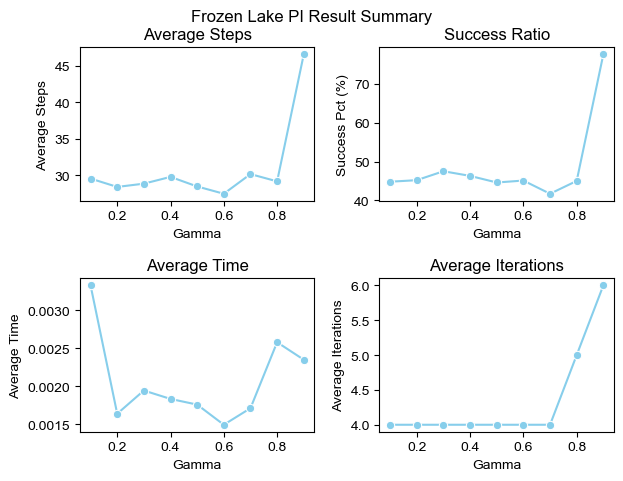

In [6]:
target_name = "Frozen Lake PI Result Summary"
model = 'PI'
result_plots(model, target_name, value_iter=None, gammas=gammas, policy_iter = policy_iter)

Best Result:
	Success = 77.60
	Gamma = 0.90
	Epsilon= 0E+00


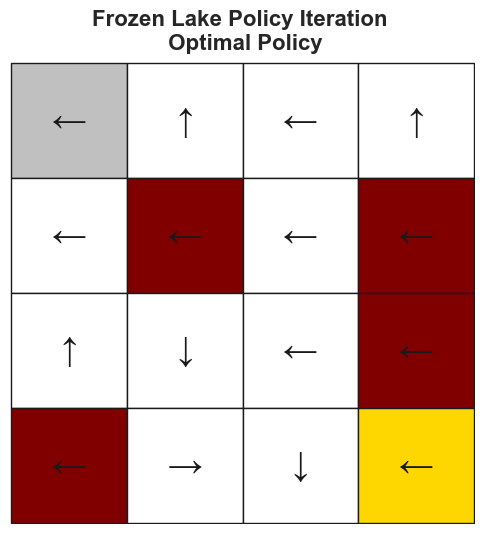

In [7]:
bestRun = policy_iter['success_pct'].argmax()
best_policy = policy_iter['policy'][bestRun]
best_policy = np.array(list(best_policy)[0])
best_policy = best_policy.reshape(rows, cols)

title= 'Frozen Lake Policy Iteration \n Optimal Policy'
plot_lake(lake_env, best_policy, title)
print('Best Result:\n\tSuccess = %.2f\n\tGamma = %.2f\n\tEpsilon= %.E' % (policy_iter['success_pct'].max(), 
                                                                          policy_iter['gamma'][bestRun], 
                                                                          policy_iter['epsilon'][bestRun]))


Q-Learning

In [8]:
# gammas   = [0.8, 0.9, 0.99]
# alphas   = [0.01, 0.1, 0.2]
# alpha_decays = [0.9, 0.999]
# epsilon_decays = [0.9, 0.999]
# iterations = [1e5, 1e6, 1e7]

gammas   = [0.9,  0.99]
alphas   = [0.1, 0.2]
alpha_decays = [0.9]
epsilon_decays = [0.9]
iterations = [1e5]

In [9]:

q_learn  = Q_learning(lake_env, rows, cols, T, R, gammas, alphas, alpha_decays=alpha_decays, epsilon_decays=epsilon_decays, n_iterations=iterations, showResults=False)

Gamma,	Alpha,	Time,	Iter,	Reward
________________________________________________________________________________
Test Num 1/4
Gamma: 0.90,	Alpha: 0.10,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.90,	0.10,	4.22,	100000,	0.047140
Test Num 2/4
Gamma: 0.90,	Alpha: 0.20,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.90,	0.20,	4.22,	100000,	0.072441
Test Num 3/4
Gamma: 0.99,	Alpha: 0.10,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.99,	0.10,	3.97,	100000,	0.067782
Test Num 4/4
Gamma: 0.99,	Alpha: 0.20,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.99,	0.20,	3.67,	100000,	0.094132


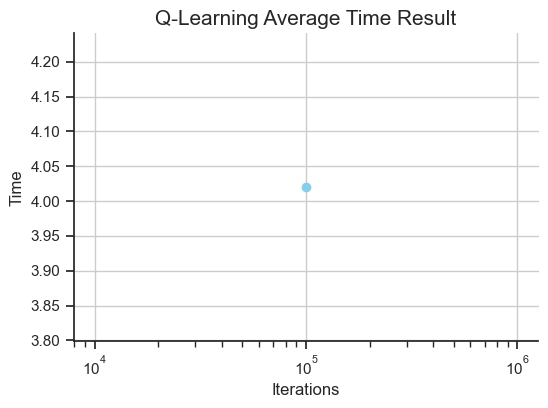

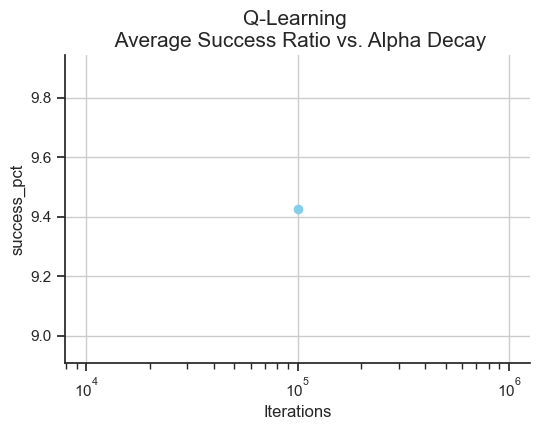

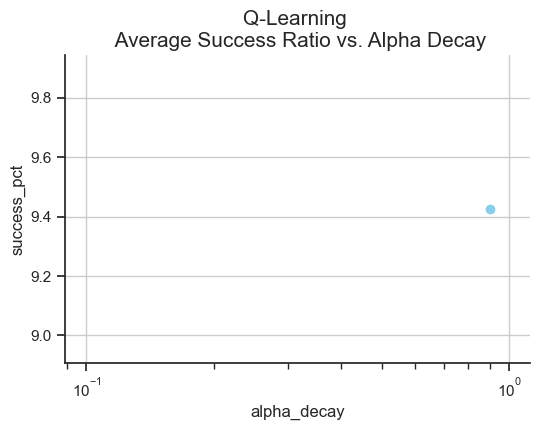

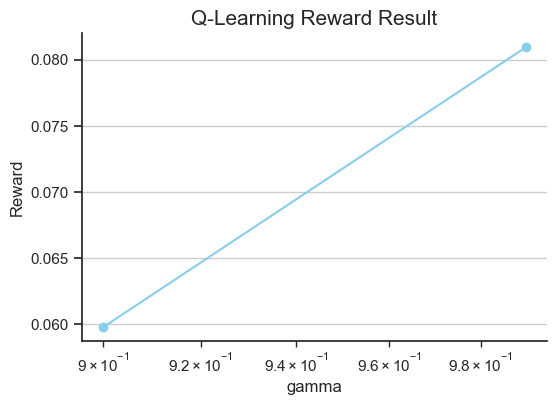

In [10]:
interest = ['gamma', 'alpha', 'alpha_decay', 'epsilon_decay', 'Iterations', 'Reward', 'Time', 'success_pct']
ql_df = q_learn[interest]

mode = 'Q-Learning '
ql_plot_result(ql_df, interest, 'Iterations', 'Time', title=mode+'Average Time Result', logscale=True)
ql_plot_result(ql_df, interest, 'Iterations', 'success_pct', title=mode+'\n Average Success Ratio vs. Alpha Decay', logscale=True)
ql_plot_result(ql_df, interest, 'alpha_decay', 'success_pct', title=mode+'\n Average Success Ratio vs. Alpha Decay', logscale=True)
ql_plot_result(ql_df, interest, 'gamma', 'Reward', title=mode+'Reward Result', logscale=True)

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/var/folders/g4/649czy952rs1q6b1tggtkh5c0000gn/T/ipykernel_16911/461403334.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ql_corr, dtype=np.bool))


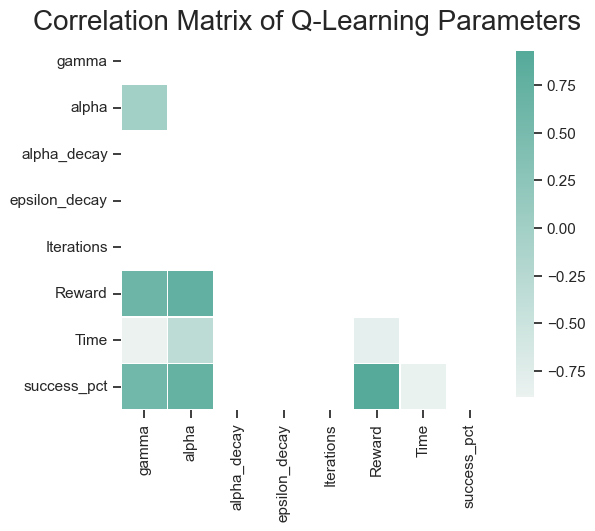

In [11]:
ql_corr = ql_df.corr()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Correlation Matrix of Q-Learning Parameters', fontsize=20)
mask = np.triu(np.ones_like(ql_corr, dtype=np.bool))
cmap = sns.color_palette("light:#5A9", as_cmap=True)
sns.heatmap(ql_corr, mask=mask, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink":.75})


Best Result:
	Success = 20.60
	Gamma = 0.99,
	Alpha = 0.20,
	Alpha Decay: 0.900,
	Epsilon Decay: 0.900,
	Iterations: 1.0E+05


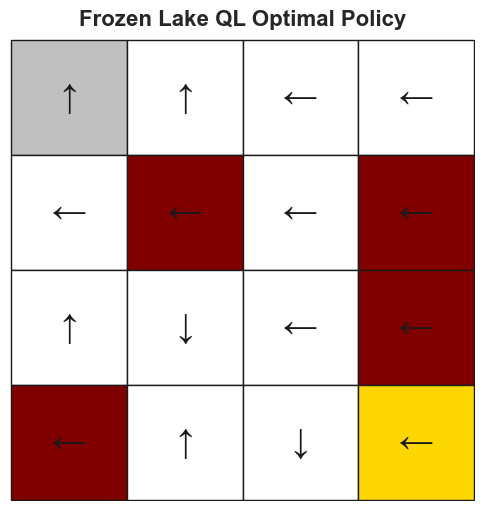

In [12]:
bestRun = q_learn['success_pct'].argmax()
best_policy = q_learn['policy'][bestRun]

# reshape the policy since we pulled from a csv file
# best_policy = best_policy[1:-1]
# best_policy = eval(best_policy)
# best_policy = np.array(best_policy)
# best_policy = best_policy.reshape(rows, cols)

best_policy = np.array(list(best_policy)[0])
best_policy = best_policy.reshape(rows, cols)

# plot the policy
title='Frozen Lake QL Optimal Policy'
plot_lake(lake_env, best_policy, title)

print('Best Result:\n\tSuccess = %.2f\n\tGamma = %.2f,\n\tAlpha = %.2f,\n\tAlpha Decay: %.3f,\n\tEpsilon Decay: %.3f,\n\tIterations: %.1E' 
      % (q_learn['success_pct'].max(), 
         q_learn['gamma'][bestRun], 
         q_learn['alpha'][bestRun], 
         q_learn['alpha_decay'][bestRun], 
         q_learn['epsilon_decay'][bestRun], 
         q_learn['Iterations'][bestRun]))